# 4.10 Part I Task #5d

This script contains the following points:

1. Create profiling variable based on certain goods in the 'department_id' column
    a. Merge departments_wrangled and orders_products_high = order_products_high_dept
    b. Show frequency counts of departments
2. Export visualization of department bar graph

In [5]:
    # Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
      #Import dataframe
path = r'C:\Users\Barb\07-2024 Instacart Basket Analysis'

In [7]:
orders_products_high = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared', 'orders_products_high_410b.pkl'))

In [8]:
     #Check output

In [9]:
orders_products_high.shape

(29303281, 38)

In [10]:
orders_products_high.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependents,marriage_status,income,...,avg_spent,spending_flag,buy_frequency,frequency_flag,_merge,region,customer_activity_flag,age_group,income_class,dependents_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8.205882,Low spender,19.823529,Regular customer,both,Midwest,high_activity,middle-aged_adult,upper_class,large_family
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8.205882,Low spender,19.823529,Regular customer,both,Midwest,high_activity,middle-aged_adult,upper_class,large_family
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8.205882,Low spender,19.823529,Regular customer,both,Midwest,high_activity,middle-aged_adult,upper_class,large_family
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8.205882,Low spender,19.823529,Regular customer,both,Midwest,high_activity,middle-aged_adult,upper_class,large_family
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8.205882,Low spender,19.823529,Regular customer,both,Midwest,high_activity,middle-aged_adult,upper_class,large_family


## Task #5 - Create profiling variable based on certain goods in the "department_id" column 

### 5.4 Customer profile:  certain goods in the 'department_id' column

#### 5.4.1 Assess if orders_products_high has necessary columns (e.g. 'department)

     #Check columns in orders_products_high

In [15]:
orders_products_high.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependents', 'marriage_status', 'income',
       'order_id', 'order_number', 'orders_day_of_week', 'hour_time_of_order',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_spent',
       'spending_flag', 'buy_frequency', 'frequency_flag', '_merge', 'region',
       'customer_activity_flag', 'age_group', 'income_class',
       'dependents_flag'],
      dtype='object')

      #drop _merge column

In [17]:
orders_products_high = orders_products_high.drop(columns = ['_merge'])

In [18]:
#No 'department' column in orders_products_high

      #Import departments_wrangled.csv because it has 'department_id' and 'department'

In [20]:
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'departments_wrangled.csv'))

        #check output of df_dept

In [22]:
df_dept.shape

(21, 2)

In [23]:
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


#### 5.4.2 Prepare for merge

                       #check data type of 'department_id' in both dataframes df_dept

In [26]:
#check data type in df_dept
df_dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [27]:
#check data type in orders_products_high
orders_products_high['department_id'].dtype

dtype('int64')

         #change data type

In [29]:
orders_products_high['department_id'] = orders_products_high['department_id'].astype('str')

In [30]:
df_dept['department_id'] = df_dept['department_id'].astype('str')

In [31]:
#check
orders_products_high['department_id'].dtype

dtype('O')

In [32]:
#check
df_dept['department_id'].dtype

dtype('O')

#### 5.4.3 Merge orders_products_high and df_dept

In [34]:
orders_products_high_dept = orders_products_high.merge(df_dept, on = 'department_id')

        #Confirm the results of the merge using the merge flag (or 'merge' column)

In [36]:
orders_products_high_dept.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependents,marriage_status,income,...,avg_spent,spending_flag,buy_frequency,frequency_flag,region,customer_activity_flag,age_group,income_class,dependents_flag,department
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8.205882,Low spender,19.823529,Regular customer,Midwest,high_activity,middle-aged_adult,upper_class,large_family,dairy eggs
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8.205882,Low spender,19.823529,Regular customer,Midwest,high_activity,middle-aged_adult,upper_class,large_family,dairy eggs
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8.205882,Low spender,19.823529,Regular customer,Midwest,high_activity,middle-aged_adult,upper_class,large_family,produce
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8.205882,Low spender,19.823529,Regular customer,Midwest,high_activity,middle-aged_adult,upper_class,large_family,produce
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,8.205882,Low spender,19.823529,Regular customer,Midwest,high_activity,middle-aged_adult,upper_class,large_family,dairy eggs


        #Show frequency counts of merge

In [38]:
orders_products_high_dept['department'].value_counts()

department
produce            8608701
dairy eggs         4909353
snacks             2620533
beverages          2437586
frozen             1996444
pantry             1681391
bakery             1060612
canned goods        954449
deli                947553
dry goods pasta     773993
household           658975
meat seafood        637276
breakfast           633469
personal care       399739
babies              391707
international       240869
alcohol             134867
pets                 87805
missing              63389
other                32572
bulk                 31998
Name: count, dtype: int64

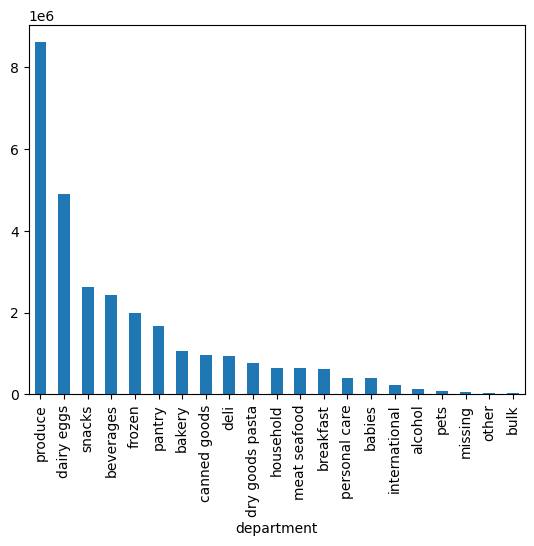

In [39]:
bar_department = orders_products_high_dept['department'].value_counts().plot.bar()

### Export Visualization

In [41]:
bar_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department.png'))

### Export dataframe orders_products_high_dept

In [43]:
orders_products_high_dept.to_pickle(os.path.join(path, '02 Data', 'Prepared', 'orders_products_high_dept410b+.pkl'))